## TEAM 14:

* Dona Samir Adly - 18P7377
* Steven Sameh Refaat - 18P9325
---

## IMPORTING IMPORTANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, roc_curve, roc_auc_score, recall_score
from sklearn.metrics import precision_score, accuracy_score, make_scorer
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

## LOADING THE DATASET

In [2]:
df = pd.read_csv('data.csv')
df.columns.values[0]="index"
df=df.set_index("index")
df.shape

(863, 14)

In [3]:
df.head(5)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
index,,,,,,,,,,,,,,
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


## DATA ANALYSIS

### 1. Correlation Analysis:

To observe if two columns are correlated using Pearson Coeffecient as a heatmap

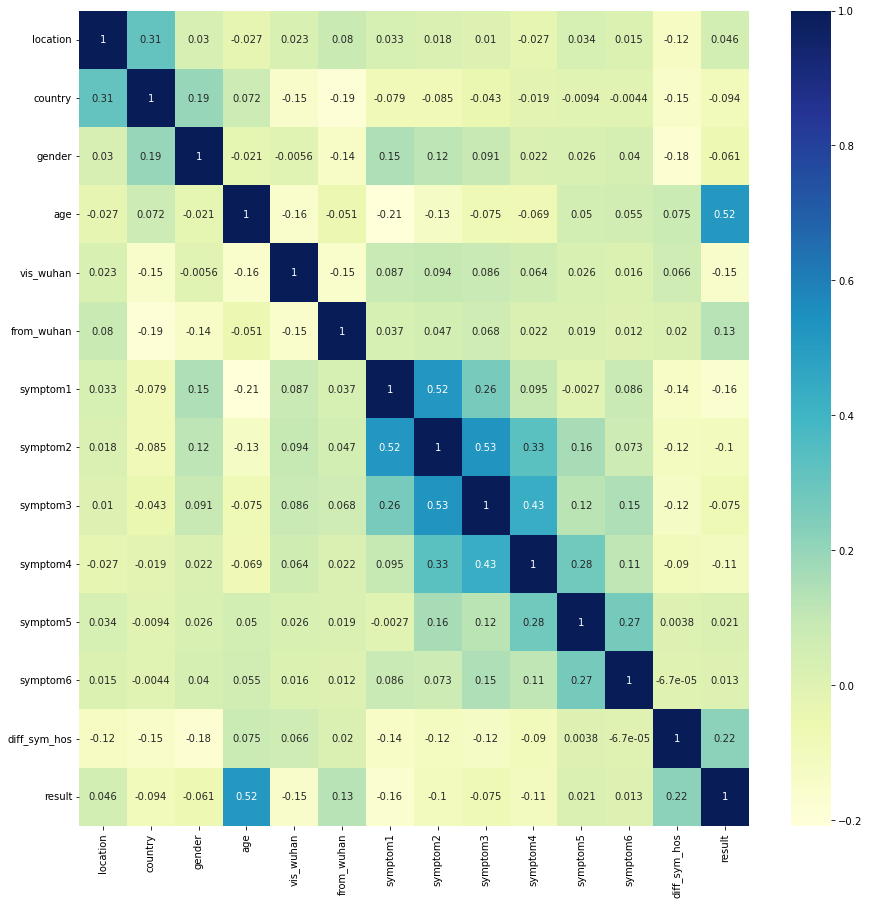

In [4]:
fig, ax = plt.subplots(figsize=(15,15))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, ax=ax)
  
plt.show()

### 2. Scatter Plots: 
Based on the correlation analysis above, we suspect some correlations, so in this part, we plot some important scatter plots, to get a clearer view of the data.

#### a. Age vs. Result: 
Because of the high correlation 0.52

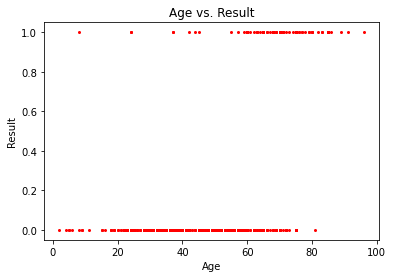

In [5]:
plt.plot(df['age'], df['result'], 'r.', markersize=4)
plt.title("Age vs. Result")
plt.xlabel('Age')
plt.ylabel("Result")
plt.show()

#### b. Symptom 1 vs Symptom 2
Because of their high correlation We suspect that one column of them can be enough and the other could be dropped.

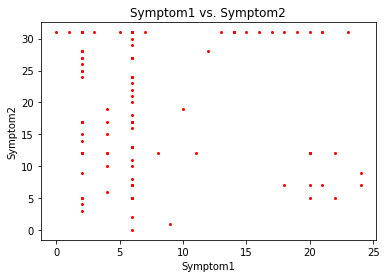

In [6]:
plt.plot(df['symptom1'], df['symptom2'], 'r.', markersize=4)
plt.title("Symptom1 vs. Symptom2")
plt.xlabel("Symptom1")
plt.ylabel("Symptom2")
plt.show()

#### c. Symptom 2 vs Symptom 3
Because of their high correlation, we also suspect that one of them could be dropped

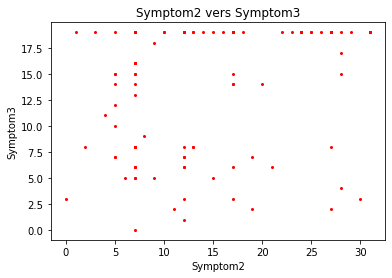

In [7]:
plt.plot(df['symptom2'], df['symptom3'], 'r.', markersize=4)
plt.title("Symptom2 vers Symptom3")
plt.xlabel("Symptom2")
plt.ylabel("Symptom3")
plt.show()

### Conclusion:

Based on these scatter plots, the correaltion between symptom1 and symptom2 is not a strong one. Also, there is no correlation concluded between symptom2 and symptom 3.

__Therefore, We can't drop any of these columns!__

It's concluded from the scatter plot of the Age and Result, that deaths is more frequent with higher age.

## 3. Histograms:
To give better insights about frequency distributions of each feature.

array([[<AxesSubplot:title={'center':'location'}>,
        <AxesSubplot:title={'center':'country'}>],
       [<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'vis_wuhan'}>,
        <AxesSubplot:title={'center':'from_wuhan'}>],
       [<AxesSubplot:title={'center':'symptom1'}>,
        <AxesSubplot:title={'center':'symptom2'}>],
       [<AxesSubplot:title={'center':'symptom3'}>,
        <AxesSubplot:title={'center':'symptom4'}>],
       [<AxesSubplot:title={'center':'symptom5'}>,
        <AxesSubplot:title={'center':'symptom6'}>],
       [<AxesSubplot:title={'center':'diff_sym_hos'}>,
        <AxesSubplot:title={'center':'result'}>]], dtype=object)

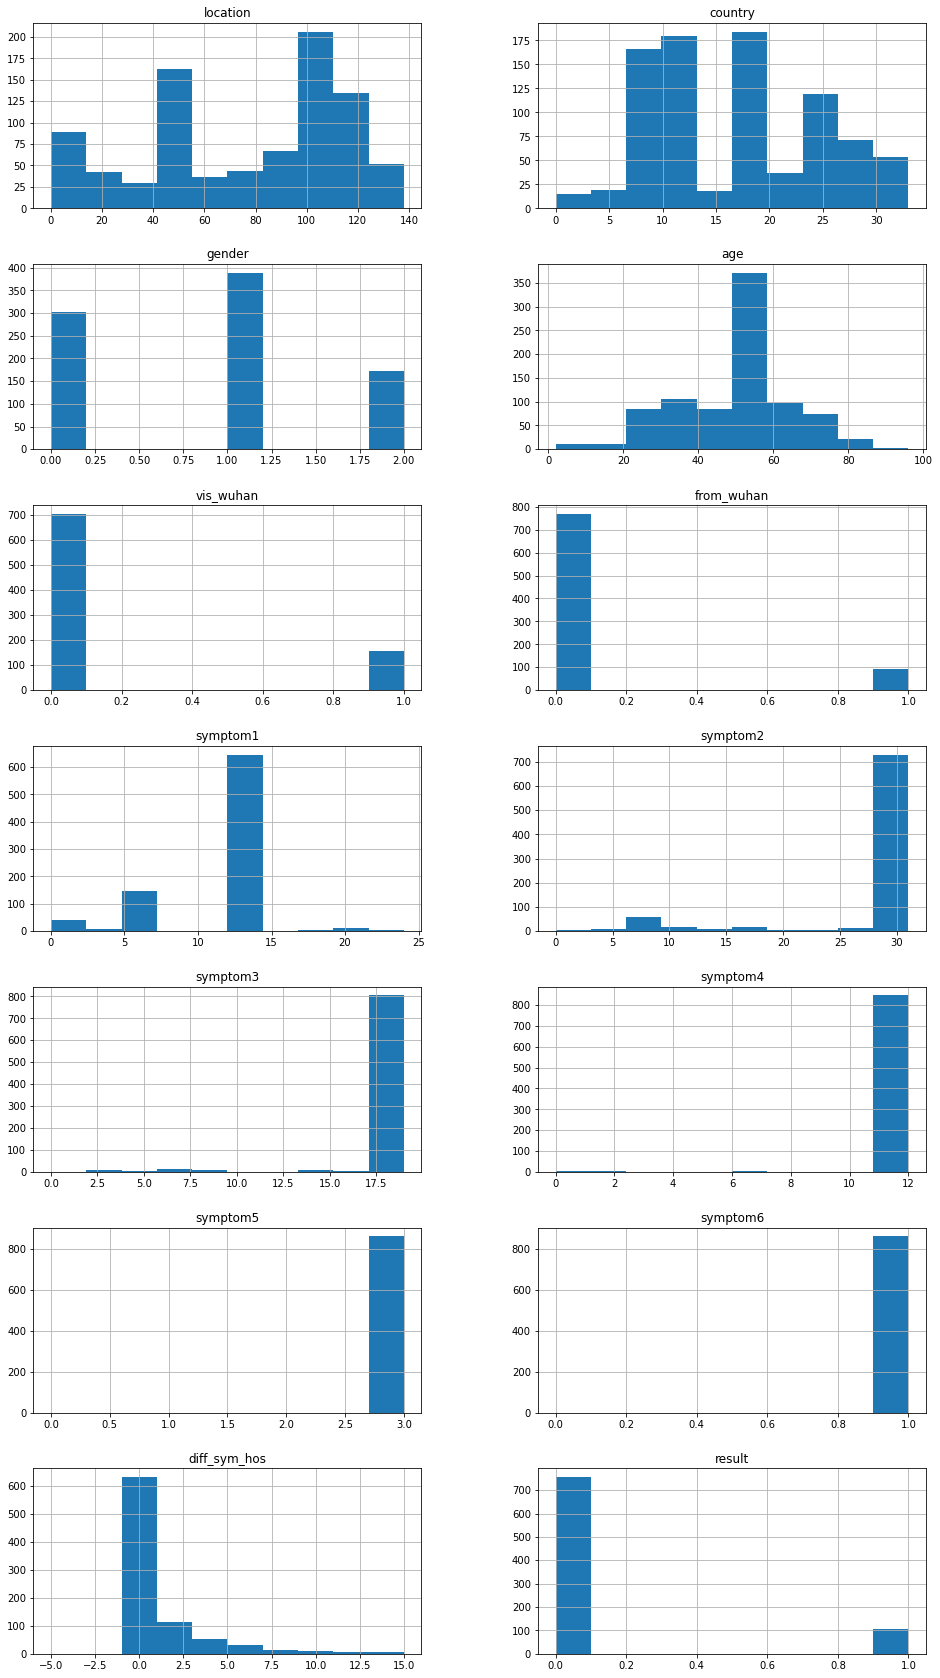

In [8]:
fig, axis = plt.subplots(7,2,figsize=(16, 30))
df.hist(ax=axis)

From the histogram of Symptoms 3 to 6, we can suspect that they are not discriminative enough. We can get clearer idea about them, if we got the frequency of each unique value in each of them.

In [9]:
cols =['symptom3','symptom4','symptom5','symptom6']
for i in range (4):
    value_counts = df[cols[i]].value_counts(sort=True)
    counts = pd.DataFrame(value_counts)
    counts_reset = counts.reset_index()
    counts_reset.columns = ['unique_value', 'counts']
    print(cols[i])
    display(counts_reset)

symptom3


,unique_value,counts
0,19,803
1,8,10
2,6,7
3,15,6
4,5,5
5,16,5
6,14,5
7,7,5
8,3,4
9,2,3


symptom4


,unique_value,counts
0,12,844
1,2,3
2,0,2
3,7,2
4,3,2
5,1,2
6,9,2
7,8,1
8,11,1
9,5,1


symptom5


,unique_value,counts
0,3,860
1,2,1
2,1,1
3,0,1


symptom6


,unique_value,counts
0,1,862
1,0,1


### Conclusion:
We can conclude from these tables, that symptom 5 and symptom 6 have no high frequency in any of their values instead of just one value, Therefore, __we can drop these columns as they are not discriminative enough__, and will not contribute in our classification. 

In [10]:
df = df.drop(columns=['symptom5', 'symptom6'])
df

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,diff_sym_hos,result
index,,,,,,,,,,,,
0,104,8,1,66.0,1,0,14,31,19,12,8,1
1,101,8,0,56.0,0,1,14,31,19,12,0,0
2,137,8,1,46.0,0,1,14,31,19,12,13,0
3,116,8,0,60.0,1,0,14,31,19,12,0,0
4,116,8,1,58.0,0,0,14,31,19,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,0,1
859,0,0,2,35.0,0,0,14,31,19,12,0,0
860,3,1,1,49.4,0,0,14,31,19,12,0,0


---